In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import copy

In [2]:
# some hints from: https://zh.wikipedia.org/wiki/%E6%8F%92%E5%85%A5%E6%8E%92%E5%BA%8F
def InsertionSort(input_array):
    sort_array = copy.deepcopy(input_array)
    compare_time = 0
    l = len(sort_array)
    for i in range(1, l):
        for j in range(i, 0, -1):    # compare from back
            compare_time += 1
            if sort_array[j] < sort_array[j-1]:
                sort_array[j], sort_array[j-1] = sort_array[j-1], sort_array[j]
            else:
                break
    return compare_time
    
def InsertionRuntime(input_array):
    time_start = time.time()
    InsertionSort(input_array)
    time_finish = time.time()
    time_run = time_finish - time_start
    return time_run
    
    # some hints form: https://www.geeksforgeeks.org/shellsort/
def ShellSort(input_array):
    sort_array = copy.deepcopy(input_array)
    compare_time = 0
    l = len(sort_array)
    gap_poor = [7, 3, 1]
    for gap in gap_poor:
        for i in range(gap, l):
            temp = sort_array[i]
            j = i
            compare_time += 1
            while j >= gap and sort_array[j-gap] > temp:
                sort_array[j] = sort_array[j-gap]
                j -= gap
            sort_array[j] = temp
    return compare_time
            
def ShellRuntime(input_array):
    time_start = time.time()
    ShellSort(input_array)
    time_finish = time.time()
    time_run = time_finish - time_start
    return time_run

In [3]:
input_1024_0 = np.loadtxt('./data/data0.1024', int)
input_2048_0 = np.loadtxt('./data/data0.2048', int)
input_4096_0 = np.loadtxt('./data/data0.4096', int)
input_8192_0 = np.loadtxt('./data/data0.8192', int)
input_16384_0 = np.loadtxt('./data/data0.16384', int)
input_32768_0 = np.loadtxt('./data/data0.32768', int)

input_1024_1 = np.loadtxt('./data/data1.1024', int)
input_2048_1 = np.loadtxt('./data/data1.2048', int)
input_4096_1 = np.loadtxt('./data/data1.4096', int)
input_8192_1 = np.loadtxt('./data/data1.8192', int)
input_16384_1 = np.loadtxt('./data/data1.16384', int)
input_32768_1 = np.loadtxt('./data/data1.32768', int)

In [4]:
# this cell used to comfirm the array does not change after sort(strange)
print(input_1024_1) 
InsertionSort(input_1024_1)
print(input_1024_1)

[930 387 821 ...  38 521 707]
[930 387 821 ...  38 521 707]


In [5]:
input_size = [1024, 2048, 4096, 8192, 16384, 32678]

In [5]:
insertion_compare_0 = [InsertionSort(input_1024_0), InsertionSort(input_2048_0), InsertionSort(input_4096_0), \
                      InsertionSort(input_8192_0), InsertionSort(input_16384_0), InsertionSort(input_32768_0)]
insertion_runtime_0 = [InsertionRuntime(input_1024_0), InsertionRuntime(input_2048_0), InsertionRuntime(input_4096_0), \
                      InsertionRuntime(input_8192_0), InsertionRuntime(input_16384_0), InsertionRuntime(input_32768_0)]
insertion_compare_1 = [InsertionSort(input_1024_1), InsertionSort(input_2048_1), InsertionSort(input_4096_1), \
                      InsertionSort(input_8192_1), InsertionSort(input_16384_1), InsertionSort(input_32768_1)]
insertion_runtime_1 = [InsertionRuntime(input_1024_1), InsertionRuntime(input_2048_1), InsertionRuntime(input_4096_1), \
                      InsertionRuntime(input_8192_1), InsertionRuntime(input_16384_1), InsertionRuntime(input_32768_1)]

In [17]:
shell_compare_0 = [ShellSort(input_1024_0), ShellSort(input_2048_0), ShellSort(input_4096_0), \
                      ShellSort(input_8192_0), ShellSort(input_16384_0), ShellSort(input_32768_0)]
shell_runtime_0 = [ShellRuntime(input_1024_0), ShellRuntime(input_2048_0), ShellRuntime(input_4096_0), \
                      ShellRuntime(input_8192_0), ShellRuntime(input_16384_0), ShellRuntime(input_32768_0)]
shell_compare_1 = [ShellSort(input_1024_1), ShellSort(input_2048_1), ShellSort(input_4096_1), \
                      ShellSort(input_8192_1), ShellSort(input_16384_1), ShellSort(input_32768_1)]
shell_runtime_1 = [ShellRuntime(input_1024_1), ShellRuntime(input_2048_1), ShellRuntime(input_4096_1), \
                      ShellRuntime(input_8192_1), ShellRuntime(input_16384_1), ShellRuntime(input_32768_1)]

In [6]:
np.savetxt('./result/insertion compare time 0.txt', insertion_compare_0, fmt='%d')
np.savetxt('./result/insertion compare time 1.txt', insertion_compare_1, fmt='%d')
np.savetxt('./result/insertion run time 0.txt', insertion_runtime_0, fmt='%f')
np.savetxt('./result/insertion run time 1.txt', insertion_runtime_1, fmt='%f')

In [18]:
np.savetxt('./result/shell compare time 0.txt', shell_compare_0, fmt='%d')
np.savetxt('./result/shell compare time 1.txt', shell_compare_1, fmt='%d')
np.savetxt('./result/shell run time 0.txt', shell_runtime_0, fmt='%f')
np.savetxt('./result/shell run time 1.txt', shell_runtime_1, fmt='%f')

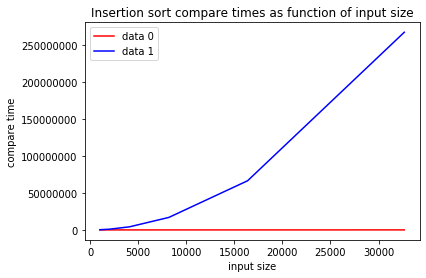

In [14]:
plt.figure()
plt.plot(input_size, insertion_compare_0, 'r', label = 'data 0')
plt.plot(input_size, insertion_compare_1, 'b', label = 'data 1')
plt.legend(loc='upper left')
plt.title('Insertion sort compare times as function of input size')
plt.xlabel('input size')
plt.ylabel('compare time')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./result/insertion compare vs input.jpg')
plt.show()

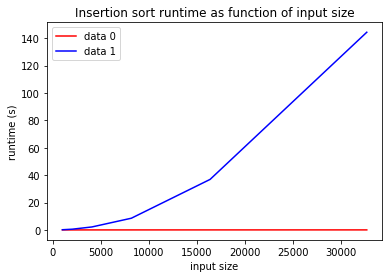

In [15]:
plt.figure()
plt.plot(input_size, insertion_runtime_0, 'r', label = 'data 0')
plt.plot(input_size, insertion_runtime_1, 'b', label = 'data 1')
plt.legend(loc='upper left')
plt.title('Insertion sort runtime as function of input size')
plt.xlabel('input size')
plt.ylabel('runtime (s)')
plt.savefig('./result/insertion runtime vs input.jpg')
plt.show()

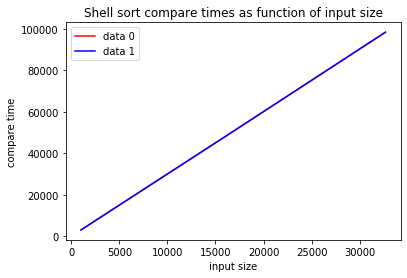

In [19]:
plt.figure()
plt.plot(input_size, shell_compare_0, 'r', label = 'data 0')
plt.plot(input_size, shell_compare_1, 'b', label = 'data 1')
plt.legend(loc='upper left')
plt.title('Shell sort compare times as function of input size')
plt.xlabel('input size')
plt.ylabel('compare time')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.savefig('./result/shell compare vs input.jpg')
plt.show()

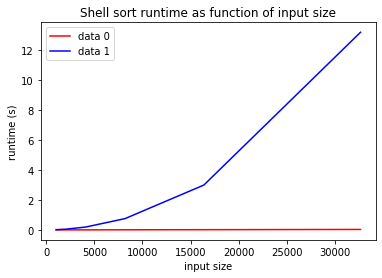

In [20]:
plt.figure()
plt.plot(input_size, shell_runtime_0, 'r', label = 'data 0')
plt.plot(input_size, shell_runtime_1, 'b', label = 'data 1')
plt.legend(loc='upper left')
plt.title('Shell sort runtime as function of input size')
plt.xlabel('input size')
plt.ylabel('runtime (s)')
plt.savefig('./result/shell runtime vs input.jpg')
plt.show()